# Prosper Loan Data Exploration
## by Jeffrey Van Anderson

## Preliminary Wrangling

**Introduction:**
> This document explores data from 113,936 loans from "Prosper" and an extensive 81 variables.  Univariate, bivariate and finally multivatiate visualizations are used as the primary exploritory tools here.  This data will be used to ask which variables affect the borrower's APR/interest rate

**Step 1:** First, all the necessary packages are imported and `*.csv` data file is imported as pandas dataframe

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#import *.csv file as pandas dataframe and display first five lines
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


**Step 2:** Next, information is displayed about the dataframe in order to become familiar with the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

**Step 3:**  After briefly previewing the data, it is clear that there are excessive column variables to address in this one report.  A select few are queried and applied to a new dataframe for analysis.

In [4]:
#create list of collumns to keep for analysis
cols_to_keep = ['ListingKey', 'BorrowerAPR', 'Term', 'IncomeRange', 'EmploymentStatus',
                'LoanOriginalAmount', 'DebtToIncomeRatio', 'ListingCategory (numeric)', 
                'IsBorrowerHomeowner', 'DelinquenciesLast7Years', 'AmountDelinquent']

#assign queried collumns as df_trimmed variable
df_trimmed = df[cols_to_keep]

#confirm successful trim
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
ListingKey                   113937 non-null object
BorrowerAPR                  113912 non-null float64
Term                         113937 non-null int64
IncomeRange                  113937 non-null object
EmploymentStatus             111682 non-null object
LoanOriginalAmount           113937 non-null int64
DebtToIncomeRatio            105383 non-null float64
ListingCategory (numeric)    113937 non-null int64
IsBorrowerHomeowner          113937 non-null bool
DelinquenciesLast7Years      112947 non-null float64
AmountDelinquent             106315 non-null float64
dtypes: bool(1), float64(4), int64(3), object(3)
memory usage: 8.8+ MB


**Step 4:** With the separate dataframe, `df_trimmed` having fifteen columns, a few more functions can be applied to learn more about the data

In [5]:
#review distribution of data in variables
df_trimmed.describe()

,BorrowerAPR,Term,LoanOriginalAmount,DebtToIncomeRatio,ListingCategory (numeric),DelinquenciesLast7Years,AmountDelinquent
count,113912.000000,113937.000000,113937.00000,105383.000000,113937.000000,112947.000000,106315.000000
mean,0.218828,40.830248,8337.01385,0.275947,2.774209,4.154984,984.507059
std,0.080364,10.436212,6245.80058,0.551759,3.996797,10.160216,7158.270157
min,0.006530,12.000000,1000.00000,0.000000,0.000000,0.000000,0.000000
25%,0.156290,36.000000,4000.00000,0.140000,1.000000,0.000000,0.000000
50%,0.209760,36.000000,6500.00000,0.220000,1.000000,0.000000,0.000000
75%,0.283810,36.000000,12000.00000,0.320000,3.000000,3.000000,0.000000
max,0.512290,60.000000,35000.00000,10.010000,20.000000,99.000000,463881.000000


In [6]:
#view null value totals for each column
df_trimmed.isnull().sum()

ListingKey                      0
BorrowerAPR                    25
Term                            0
IncomeRange                     0
EmploymentStatus             2255
LoanOriginalAmount              0
DebtToIncomeRatio            8554
ListingCategory (numeric)       0
IsBorrowerHomeowner             0
DelinquenciesLast7Years       990
AmountDelinquent             7622
dtype: int64

**Step 5:**  After inspection, there are a few more tidyness and cleanliness issues that need to be addressed as follows:
* `ListingCategory (numeric)` title needs to be shortened
* there is null data in a few columns
* some datatypes should be changed
 * `Term` should be categorical
 * `IncomeRange` should be categorical 
* the `ListingCategory` column values should be replaced with strings to avoid unnecesssary referencing

In [7]:
#remove ' (numeric)' string from `ListingCategory`
df_trimmed = df_trimmed.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"})
df_trimmed.head(1)

,ListingKey,BorrowerAPR,Term,IncomeRange,EmploymentStatus,LoanOriginalAmount,DebtToIncomeRatio,ListingCategory,IsBorrowerHomeowner,DelinquenciesLast7Years,AmountDelinquent
0,1021339766868145413AB3B,0.16516,36,"$25,000-49,999",Self-employed,9425,0.17,0,True,4.0,472.0


In [8]:
#create list of columns with nulls
nulls_todrop = ['EmploymentStatus', 'DebtToIncomeRatio',
                'DelinquenciesLast7Years', 'AmountDelinquent']

#drop row observalions where there are nulls in each specified column
for col in nulls_todrop:
    df_trimmed = df_trimmed[df_trimmed[col].notnull()]


In [9]:
#create dictionary of desired orders for each category
cat_dict = {'Term' : [12, 36, 60],
            'IncomeRange' : ['Not employed', 'Not displayed', '$1-24,999', '$25,000-49,999',
                             '$50,000-74,999', '$75,000-99,999', '$100,000+']}

#loop over two dictionary variables and apply each ordered list to categorical Dtype
for col in cat_dict:
    order = pd.api.types.CategoricalDtype(ordered = True, categories = cat_dict[col])
    df_trimmed[col] = df_trimmed[col].astype(order)


In [11]:
#confirm success of changed dtypes
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97905 entries, 0 to 113936
Data columns (total 11 columns):
ListingKey                 97905 non-null object
BorrowerAPR                97905 non-null float64
Term                       97905 non-null category
IncomeRange                97905 non-null category
EmploymentStatus           97905 non-null object
LoanOriginalAmount         97905 non-null int64
DebtToIncomeRatio          97905 non-null float64
ListingCategory            97905 non-null int64
IsBorrowerHomeowner        97905 non-null bool
DelinquenciesLast7Years    97905 non-null int32
AmountDelinquent           97905 non-null float64
dtypes: bool(1), category(2), float64(3), int32(1), int64(2), object(2)
memory usage: 6.6+ MB


In [12]:
#change `ListingCategory` from integer to category string
#first change dtype to string for iteration
df_trimmed['ListingCategory'] = df_trimmed['ListingCategory'].astype('str')

#assign dictionary of category name to number
cat_dict = {'0' : 'Not Available',
            '1' : 'Debt Consolidation',
            '2' : 'Home Improvement', 
            '3' : 'Business',
            '4' : 'Personal Loan',
            '5' : 'Student Use',
            '6' : 'Auto', 
            '7' : 'Other',
            '8' : 'Baby&Adoption',
            '9' : 'Boat',
            '10' : 'Cosmetic Procedure',
            '11' : 'Engagement Ring',
            '12' : 'Green Loans',
            '13' : 'Household Expenses', 
            '14' : 'Large Purchases',
            '15' : 'Medical/Dental',
            '16' : 'Motorcycle',
            '17' : 'RV',
            '18' : 'Taxes',
            '19' : 'Vacation',
            '20' : 'Wedding Loans'}

#loop over column and replace numbers with category strings
for num, string in cat_dict.items():
    df_trimmed['ListingCategory'] = df_trimmed['ListingCategory'].replace(num, string)

#confirm success
df_trimmed['ListingCategory'].value_counts()

Debt Consolidation    54628
Other                  9531
Not Available          9161
Home Improvement       6959
Business               5205
Auto                   2363
Personal Loan          2271
Household Expenses     1788
Medical/Dental         1404
Large Purchases         806
Taxes                   788
Wedding Loans           732
Vacation                722
Student Use             605
Motorcycle              289
Engagement Ring         201
Baby&Adoption           191
Boat                     83
Cosmetic Procedure       82
RV                       50
Green Loans              46
Name: ListingCategory, dtype: int64

**Step 5.5:** Since the two columns: `AmountDelinquent`, and `DelinquenciesLast7Years` need to have zeroes disregarded in order to perform exploratory analysis in the next section, these zeroes should be replaced with null values.

In [13]:
#replace zeroes with NaN values in the three specified columns
del_cols = ['AmountDelinquent', 'DelinquenciesLast7Years']
df_trimmed[del_cols] = df_trimmed[del_cols].replace({0 : np.nan})

#ensure success
df_trimmed[del_cols].describe()

,AmountDelinquent,DelinquenciesLast7Years
count,15525.000000,31100.00000
mean,6326.955684,12.69299
std,17003.297287,14.14363
min,1.000000,1.00000
25%,248.000000,3.00000
50%,1072.000000,8.00000
75%,5078.000000,17.00000
max,463881.000000,99.00000


In [14]:
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97905 entries, 0 to 113936
Data columns (total 11 columns):
ListingKey                 97905 non-null object
BorrowerAPR                97905 non-null float64
Term                       97905 non-null category
IncomeRange                97905 non-null category
EmploymentStatus           97905 non-null object
LoanOriginalAmount         97905 non-null int64
DebtToIncomeRatio          97905 non-null float64
ListingCategory            97905 non-null object
IsBorrowerHomeowner        97905 non-null bool
DelinquenciesLast7Years    31100 non-null float64
AmountDelinquent           15525 non-null float64
dtypes: bool(1), category(2), float64(4), int64(1), object(3)
memory usage: 7.0+ MB


**Step 6:** Now that the data is wrangled, it is time to reflect on it prior to exploratory analysis.

### What is the structure of your dataset?

> After some trimming, tidying and wrangling the dataframe to be explored has considerably fewer columns than the original dataset; however, the number of rows are less since incomplete data was dropped.  There are eleven columns in the resulting dataframe (ten variables and one key) and 97,905 rows or loan records with no null values except for the two delinquency columns.  These two columns have nulls instead of zeroes for further analysis

> For the eleven variable collumns, there are the following data types:
> * there are five numeric columns (four float and one integer)
> * there are two ordered categorical columns for `Term` and `IncomeRange`
> * there are two object or string columns for unordered categories
> * finally, the `IsBorrowerHomeowner` column is a simple bool answer.

### What is/are the main feature(s) of interest in your dataset?

> Of primary interest is which variables effect the APR of loans.  Additionally, it would be interesting to see if `AmountDelinquent` is of any consequence to the APR or if they are related to `DelinquenciesLast7Years`.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Each of the variables could very well effect the `BorrowerAPR` with the exception of `AmountDelinquent`.  This is since the `AmountDelinquent` variable was taken at the time of record and not the time of loan; however, it may be effected by the `BorrowerAPR`.  

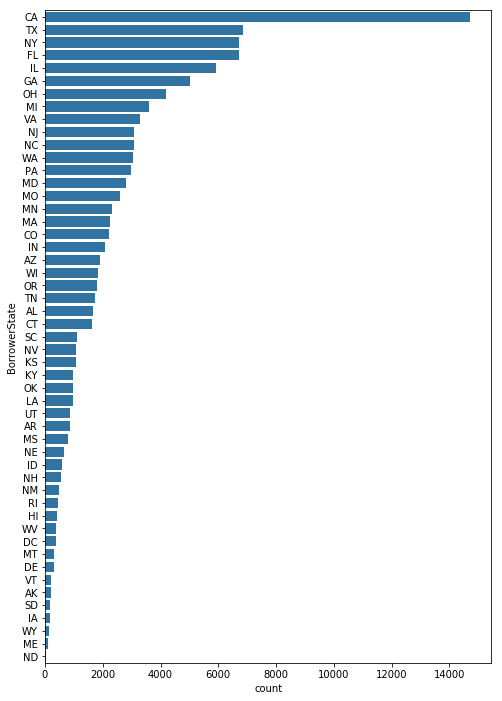

In [15]:
#set first color in seaborn color_palette to the `base_color` variable for less distracting bar charts
base_color = sns.color_palette()[0]

#plots a bar chart of loans by `BorrowerState`
plt.figure(figsize=(8,12))
state_order = df.BorrowerState.value_counts().index
sns.countplot(data = df, y = 'BorrowerState', color = base_color, order = state_order);

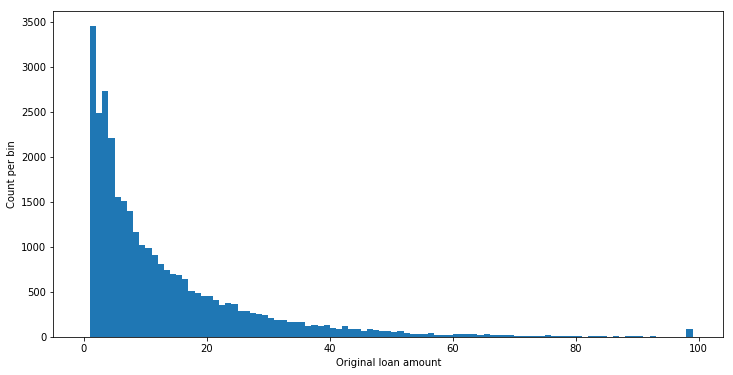

In [16]:
#Creates an array of bins at a specified binsize for histogram
binsize = 1
bins = np.arange(0, df_trimmed['DelinquenciesLast7Years'].max() + binsize, binsize)

#plots a histogram of `LoanOriginalAmount`
plt.figure(figsize=(12,6))
plt.hist(data = df_trimmed, x = 'DelinquenciesLast7Years', bins = bins)

plt.xlabel('Original loan amount')
plt.ylabel('Count per bin');